<a href="https://colab.research.google.com/github/Morrissenzeyi/KNN-and-Naive-bayes-IP/blob/main/KNN%20and%20Naive%20Bayes%20IP%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [167]:
# previewing the dataset
test = pd.read_csv("/content/test (1).csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [168]:
# changing passengerId column to be our index
test = test.set_index('PassengerId')

In [169]:
# previewing the dataset
train = pd.read_csv("/content/train (5).csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [170]:
# size of the dataset
train.shape

(891, 12)

In [171]:
# changing passengerId column to be our index
train = train.set_index('PassengerId')

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [173]:
# size of test dataset
test.shape

(418, 10)

In [174]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [175]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [176]:
# replacing age NaN WITH MEAN values of age
train['Age'].fillna(train['Age'].mean(),inplace=True)
# drop the cabin column
train = train.drop(columns=['Cabin'])
train = train.dropna()


In [177]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [178]:
# Identifying the duplicate Data

len(train)-len(train.drop_duplicates())

0

In [179]:
# Checking for Outliers
train1 = train[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
Q1 = train1.quantile(0.25)
Q3 = train1.quantile(0.75)
IQR = Q3 - Q1
((train1 < (Q1 - 1.5 * IQR)) | (train1 > (Q3 + 1.5 * IQR))).sum()
# we can't drop all this outliers it can affect our work by reducing the quality of the dataset.

Survived      0
Pclass        0
Age          65
SibSp        46
Parch       213
Fare        114
dtype: int64

In [180]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


In [181]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [182]:
# Encoding
cat_cols = ['Sex']

for col in cat_cols:
  cat_enc = {'Sex':{'male':0,'female':1}}

train.replace(cat_enc, inplace=True)

train['Sex'].astype(int)

cat_cols = ['Embarked']

for col in cat_cols:
  cat_enc = {'Embarked':{'S':0,'C':1,'Q':2}}

train.replace(cat_enc, inplace=True)

train['Embarked'].astype(int)


PassengerId
1      0
2      1
3      0
4      0
5      0
      ..
887    0
888    0
889    0
890    1
891    2
Name: Embarked, Length: 889, dtype: int64

In [183]:
train.shape

(889, 10)

test

In [184]:
# checking for missing values
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [185]:
# replacing age NaN WITH MEAN values of age
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [186]:
# Dropping cabin column
test = test.drop(columns=['Cabin'])

In [187]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [188]:
# Identifying the duplicate Data

len(test)-len(test.drop_duplicates())

0

In [189]:
# Checking for Outliers
test1 = test[[ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
Q1 = test1.quantile(0.25)
Q3 = test1.quantile(0.75)
IQR = Q3 - Q1
((train1 < (Q1 - 1.5 * IQR)) | (train1 > (Q3 + 1.5 * IQR))).sum()
# we can't drop all this outliers it can affect our work by reducing the quality of the dataset.

Age          71
Fare        112
Parch       213
Pclass        0
SibSp        46
Survived      0
dtype: int64

In [190]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S


In [191]:
test.shape

(418, 9)

In [192]:
# encoding the Sex column

cat_cols = ['Sex']

for col in cat_cols:
  cat_enc = {'Sex':{'male':0,'female':1}}

test.replace(cat_enc, inplace=True)

test['Sex'].astype(int)


cat_cols = ['Embarked']

for col in cat_cols:
  cat_enc = {'Embarked':{'S':0,'C':1,'Q':2}}

test.replace(cat_enc, inplace=True)

test['Embarked'].astype(int)

test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.50,0,0,330911,7.83,2
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00,1,0,363272,7.00,0
894,2,"Myles, Mr. Thomas Francis",0,62.00,0,0,240276,9.69,2
895,3,"Wirz, Mr. Albert",0,27.00,0,0,315154,8.66,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00,1,1,3101298,12.29,0


#EDA

# Univariate Analysis

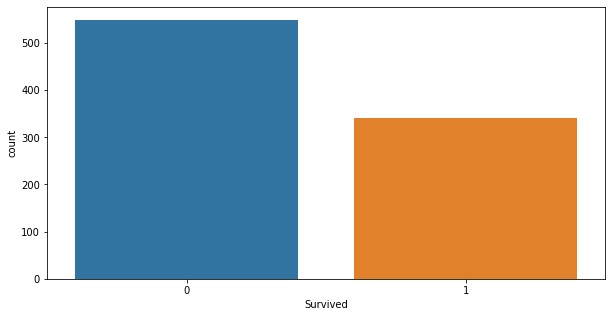

In [193]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=train)
plt.show()

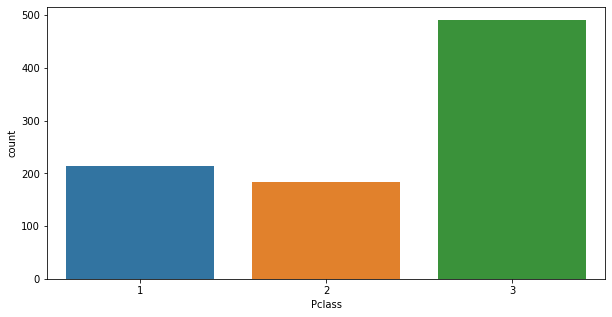

In [194]:
# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=train)
plt.show()

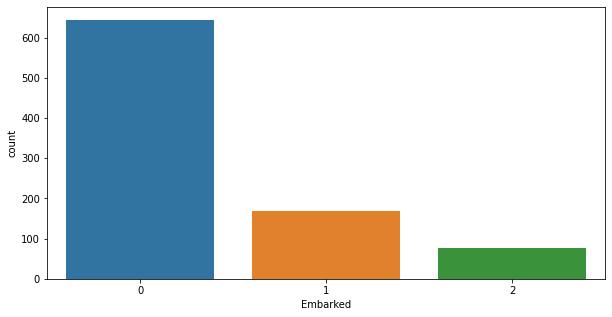

In [195]:
# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Embarked', data=train)
plt.show()

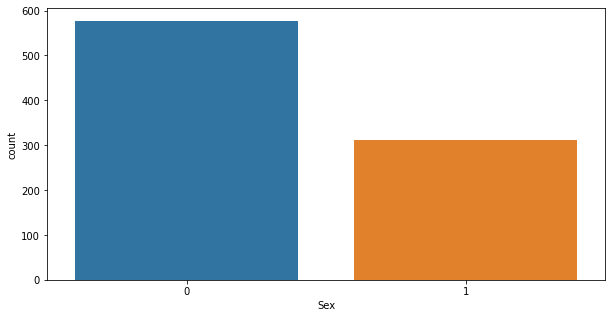

In [196]:
# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=train)
plt.show()

#Bivariate

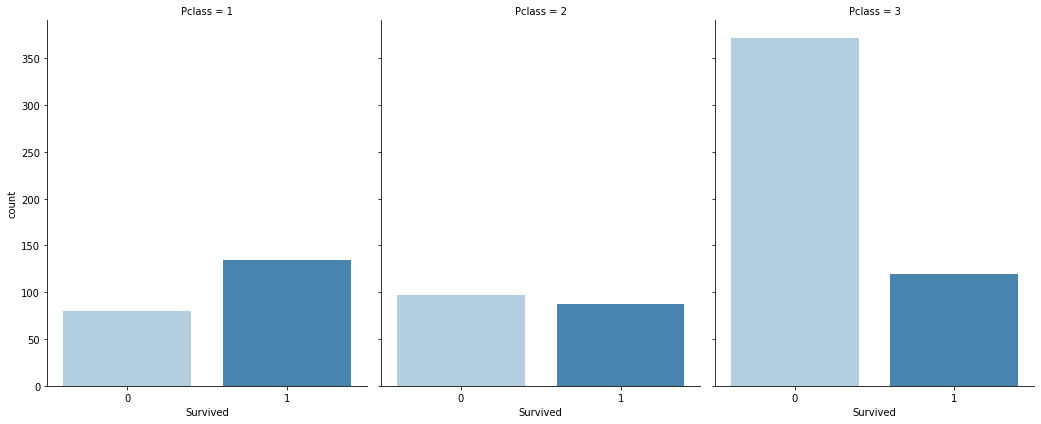

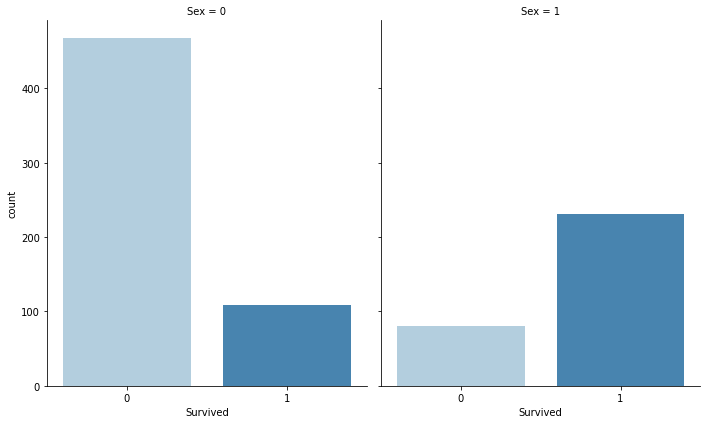

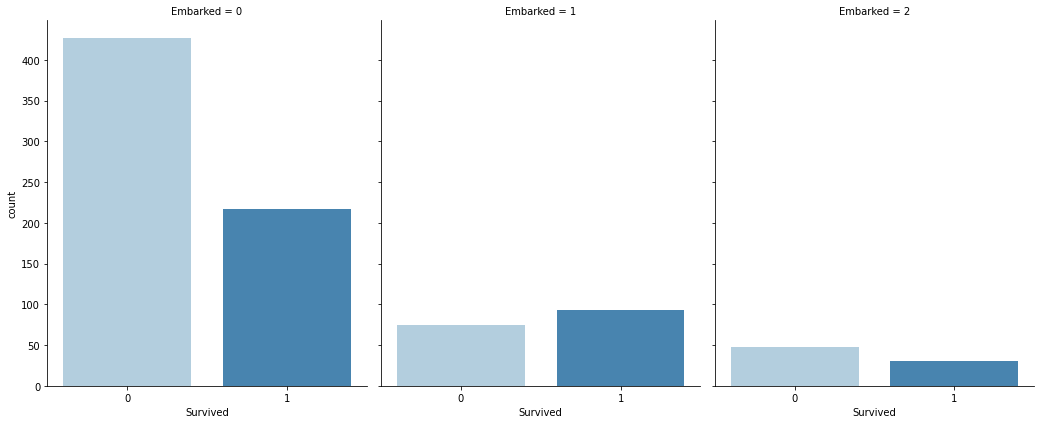

In [197]:
sns.catplot("Survived", col="Pclass", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("Survived", col="Sex", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("Survived", col="Embarked", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Blues')


plt.show()

In [198]:
#Creating a dataframe for the correlations in our dataset.
correlations = train.corr()
correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,-0.34,0.54,-0.07,-0.03,0.08,0.26,0.11
Pclass,-0.34,1.00,-0.13,-0.33,0.08,0.02,-0.55,0.04
Sex,0.54,-0.13,1.00,-0.09,0.12,0.25,0.18,0.12
Age,-0.07,-0.33,-0.09,1.00,-0.23,-0.18,0.09,0.01
SibSp,-0.03,0.08,0.12,-0.23,1.00,0.41,0.16,-0.06
Parch,0.08,0.02,0.25,-0.18,0.41,1.00,0.22,-0.08
Fare,0.26,-0.55,0.18,0.09,0.16,0.22,1.00,0.06
Embarked,0.11,0.04,0.12,0.01,-0.06,-0.08,0.06,1.00


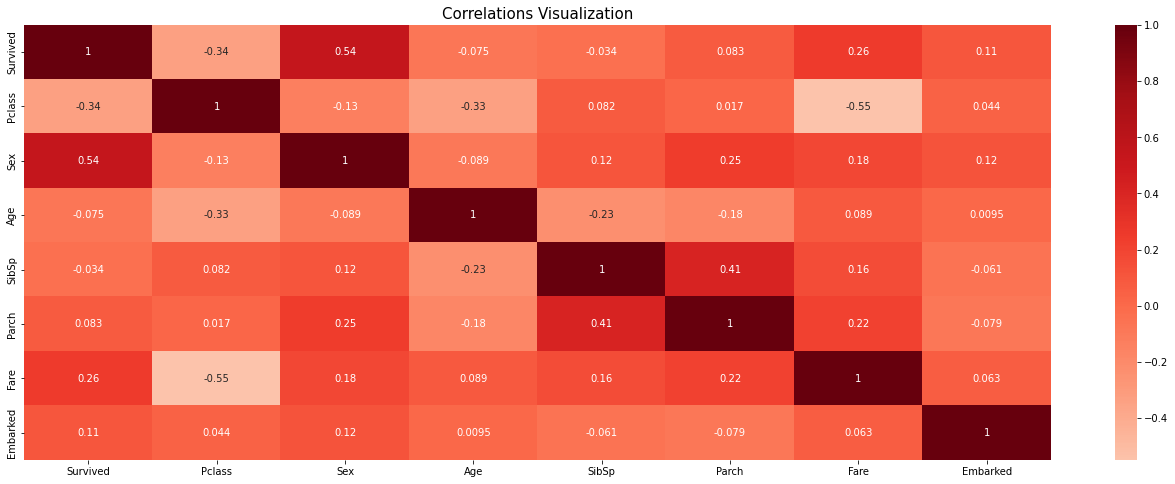

In [199]:
#Visualzing the correlations in our dataset
plt.figure(figsize = (23, 8))
sns.heatmap(correlations, annot = True, center = 0,cmap="Reds")
plt.title('Correlations Visualization', fontsize = 15)
plt.show()

#**implementing the solution**

In [200]:
# Split the independent and dependent variables
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = train['Survived']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [201]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


array([[ 0.82520863, -0.73534203, -0.59049493, ..., -0.47432585,
        -0.50023975, -0.56968402],
       [-1.57221121,  1.35991138,  0.64397101, ..., -0.47432585,
         0.78894661,  1.00313924],
       [ 0.82520863,  1.35991138, -0.28187844, ..., -0.47432585,
        -0.48664993, -0.56968402],
       ...,
       [ 0.82520863,  1.35991138,  0.00352373, ...,  2.00611934,
        -0.17408416, -0.56968402],
       [-1.57221121, -0.73534203, -0.28187844, ..., -0.47432585,
        -0.0422126 ,  1.00313924],
       [ 0.82520863, -0.73534203,  0.18104628, ..., -0.47432585,
        -0.49017322,  2.5759625 ]])